In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

read = pd.read_csv('guns.csv')

In [2]:
read.columns = map(str.capitalize, read.columns)
print(read.head(n=5))

   Unnamed: 0  Year  Month   Intent  Police Sex   Age                    Race  \
0           1  2012      1  Suicide       0   M  34.0  Asian/Pacific Islander   
1           2  2012      1  Suicide       0   F  21.0                   White   
2           3  2012      1  Suicide       0   M  60.0                   White   
3           4  2012      2  Suicide       0   M  64.0                   White   
4           5  2012      2  Suicide       0   M  31.0                   White   

   Hispanic            Place  Education  
0       100             Home        4.0  
1       100           Street        3.0  
2       100  Other specified        4.0  
3       100             Home        4.0  
4       100  Other specified        2.0  


In [3]:
print(read.Race.value_counts(ascending=False))
gundeath = read.copy(deep=True)
gundeath = gundeath.dropna()


White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: Race, dtype: int64


In [4]:
Count = pd.DataFrame(gundeath.Intent.value_counts(ascending=False))

In [5]:
Count = Count.sort_index(axis=0, level=None, ascending=True)

In [27]:
Values = pd.Index(Count).tolist()

ValueError: Index data must be 1-dimensional

In [7]:
Intent = sorted(list(set(gundeath['Intent'])), key=str.lower)

In [8]:
fig = plt.figure(figsize=(9,6))

<Figure size 648x432 with 0 Axes>

In [9]:
plt.pie(Values, labels = Intent, autopct = '%1.1f%%')

NameError: name 'Values' is not defined

No handles with labels found to put in legend.


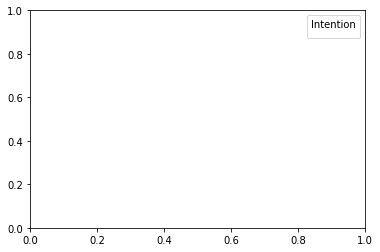

In [10]:
plt.legend(title='Intention')

Text(0.5, 1.0, 'Cause of deaths')

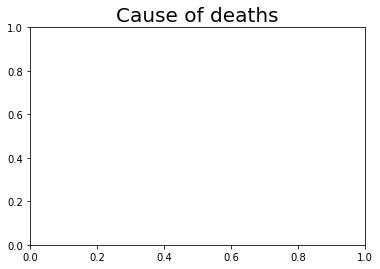

In [11]:
plt.title('Cause of deaths', fontsize=20)

(-0.05, 1.05, -0.05, 1.05)

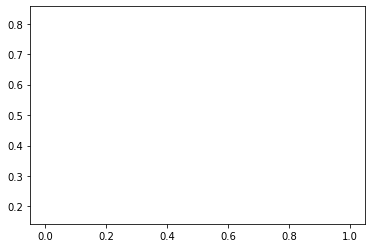

In [12]:
plt.axis('equal')

In [13]:
Circle = plt.Circle(xy=(0,0),radius=0.5,facecolor='white')

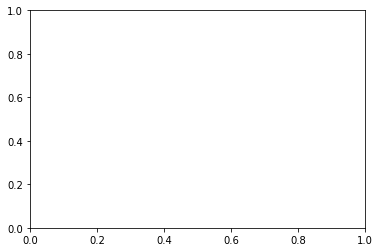

In [14]:
plt.gca().add_artist(Circle)

In [15]:
gundeath['Race'].replace('Native American/Native Alaskan','Native', inplace=True)

In [16]:
gundeath['Race'].replace('Asian/Pacific Islander','Asian', inplace=True)

In [17]:
Count = pd.DataFrame(gundeath.Race.value_counts(ascending=False))

In [18]:
Count = Count.sort_index(axis=0, level=None, ascending=True)

In [19]:
Values = pd.Index(Count).tolist()

ValueError: Index data must be 1-dimensional

In [20]:
Race = sorted(list(set(gundeath['Race'])), key=str.lower)

In [21]:
fig = plt.figure(figsize=(9, 6))

<Figure size 648x432 with 0 Axes>

In [22]:
plt.pie(Values, labels = Race, startangle = 120,autopct = '%1.1f%%')

NameError: name 'Values' is not defined

(-0.05, 1.05, -0.05, 1.05)

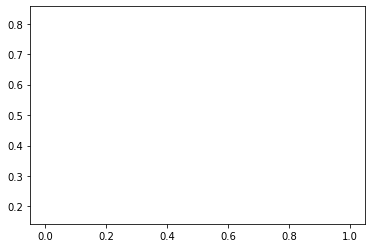

In [23]:
plt.axis('equal')

No handles with labels found to put in legend.


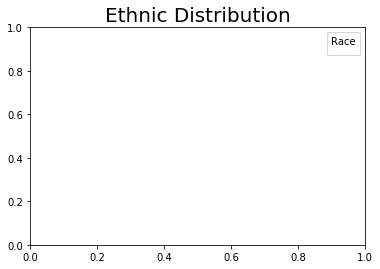

In [24]:
plt.legend(title='Race')
plt.title('Ethnic Distribution', fontsize=20)
Circle = plt.Circle(xy=(0,0),radius=0.5,facecolor='white')
plt.gca().add_artist(Circle)


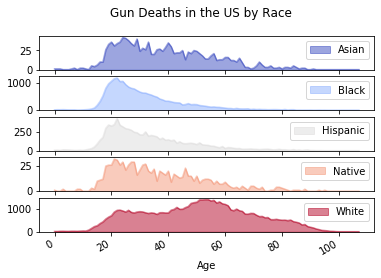

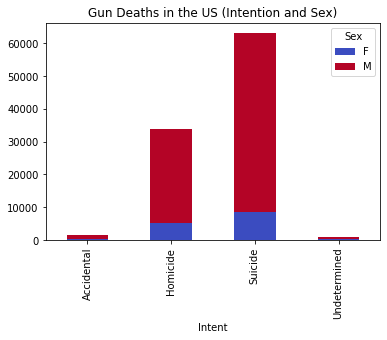

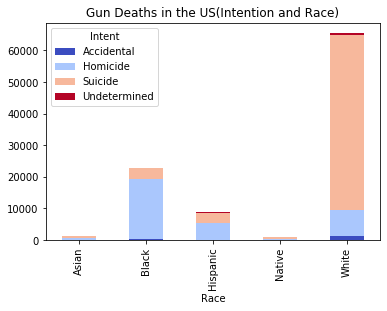

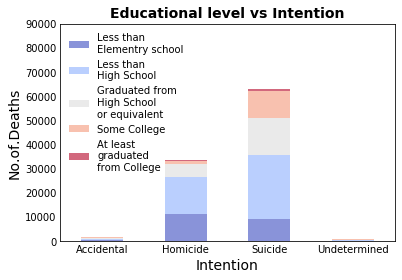

In [25]:
r_a = pd.pivot_table(gundeath,values ='Sex',index=['Age'],columns=['Race'], aggfunc = 'count' )
r_a.plot.area(subplots=True,title = 'Gun Deaths in the US by Race',colormap='coolwarm',stacked=False)


r_a = pd.pivot_table(gundeath,values ='Age',index=['Intent'],columns=['Sex'], aggfunc = 'count' )
r_a.plot.bar(title = 'Gun Deaths in the US (Intention and Sex)',colormap='coolwarm',stacked=True)

r_a = pd.pivot_table(gundeath,values ='Age',index=['Race'],columns=['Intent'], aggfunc = 'count' )
r_a.plot.bar(title = 'Gun Deaths in the US(Intention and Race)',colormap='coolwarm',stacked=True)



intent_edu = gundeath.groupby(['Intent', 'Education'])['Intent'].count().unstack('Education')

edu_legend_labels = ['Less than\nElementry school','Less than \nHigh School', 'Graduated from\nHigh School\nor equivalent', 
                 'Some College', 'At least\ngraduated\nfrom College']


ax = intent_edu.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.5, alpha=0.6)
plt.xticks(rotation=0)
ax.set_xlabel('Intention', fontsize=14)
ax.set_ylabel('No.of.Deaths', fontsize=14)
plt.tick_params(axis='both', which='both',length=0)
ax.legend(edu_legend_labels, ncol=1, frameon=False, prop={'size':10}, loc=0)
plt.ylim(ymin=0, ymax=90000)
plt.title('Educational level vs Intention', fontsize=14, fontweight='bold')

plt.show()

